In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

columns = ['sarcini', 'glucoza', 'tensiune', 'pliu_cutanat', 'insulina', 'BMI', 'pedigree', 'varsta', 'class']
df = pd.read_csv('/content/drive/Othercomputers/Omen/III/Sem II/AI/LUCRARI_10/clasificare_diabet_gen_F.csv', names=columns)

print(df.head())

   sarcini  glucoza  tensiune  pliu_cutanat  insulina   BMI  pedigree  varsta  \
0        6      148        72            35         0  33.6     0.627      50   
1        1       85        66            29         0  26.6     0.351      31   
2        8      183        64             0         0  23.3     0.672      32   
3        1       89        66            23        94  28.1     0.167      21   
4        0      137        40            35       168  43.1     2.288      33   

   class  
0      1  
1      0  
2      1  
3      0  
4      1  


In [ ]:

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
print("\ntrain\n----------------\n",train.head())
print("\nvalid\n----------------\n",valid.head())
print("\ntest\n----------------\n",test.head() )


train
----------------
      sarcini  glucoza  tensiune  pliu_cutanat  insulina   BMI  pedigree  \
7         10      115         0             0         0  35.3     0.134   
453        2      119         0             0         0  19.6     0.832   
521        3      124        80            33       130  33.2     0.305   
116        5      124        74             0         0  34.0     0.220   
264        4      123        62             0         0  32.0     0.226   

     varsta  class  
7        29      0  
453      72      0  
521      26      0  
116      38      1  
264      35      1  

valid
----------------
      sarcini  glucoza  tensiune  pliu_cutanat  insulina   BMI  pedigree  \
338        9      152        78            34       171  34.2     0.893   
90         1       80        55             0         0  19.1     0.258   
114        7      160        54            32       175  30.5     0.588   
523        9      130        70             0         0  34.2     0.652  

In [ ]:
#Verificam nevoia de oversample/undersample
#pt ca sunt inegale numerele de clase o sa fie un bias catre cele cu 0
#asa ca o sa dam oversample la cele din clasa 1
#also le normalizam
ones = 0
zeros = 0

for i in train["class"]:
  if i == 1:
    ones = ones+1
  else:
    zeros = zeros+1

print("Ones: ", ones)
print("Zeros: ", zeros)

Ones:  149
Zeros:  311


In [ ]:
#Clasa pentru normalizare si oversample daca este cazul
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)
  

  data = np.hstack((X, np.reshape(y,(-1,1))))

  return data, X, y

In [ ]:
#impartim train valid test in x si y si le scalam si pt train folosim si oversampler
train , X_train, y_train = scale_dataset(train, oversample=True)
valid , X_valid, y_valid = scale_dataset(valid, oversample=False)
test , X_test, y_test = scale_dataset(test, oversample=False)


In [ ]:
#print to see if scaler works
print("\ntrain\n----------------\n",train)


train
----------------
 [[ 1.7935127  -0.18395383 -3.42691367 ... -0.99820918 -0.37296774
   0.        ]
 [-0.55028231 -0.05387118 -3.42691367 ...  1.02463186  3.22747242
   0.        ]
 [-0.25730793  0.10873213  0.53894762 ... -0.5026421  -0.62416124
   0.        ]
 ...
 [-0.55028231 -0.99697039 -0.05593158 ...  0.0711724  -0.54043007
   1.        ]
 [-1.13623106  0.66158339 -3.42691367 ... -0.79244741 -0.37296774
   1.        ]
 [-0.84325668 -0.83436708  0.63809415 ... -0.71130193  0.79926859
   1.        ]]


In [ ]:
#Keras model from the assigmnet


In [ ]:
def train_model(X_train, y_train, lr, batch_size, epochs):
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_dim=8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

  return model, history



In [ ]:
#Plotting functions
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

Epoch 1/100
16/16 [==============================] - 2s 28ms/step - loss: 0.6971 - accuracy: 0.4970 - val_loss: 0.7120 - val_accuracy: 0.4480
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.5734 - val_loss: 0.7451 - val_accuracy: 0.4000
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6495 - accuracy: 0.6157 - val_loss: 0.7707 - val_accuracy: 0.3440
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6323 - accuracy: 0.6419 - val_loss: 0.7924 - val_accuracy: 0.3200
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6186 - accuracy: 0.6499 - val_loss: 0.8123 - val_accuracy: 0.2720
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6065 - accuracy: 0.6559 - val_loss: 0.8155 - val_accuracy: 0.2640
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5955 - accuracy: 0.6781 - val_loss: 0.8244 - val_accuracy: 0.2720
Epoch 8/100


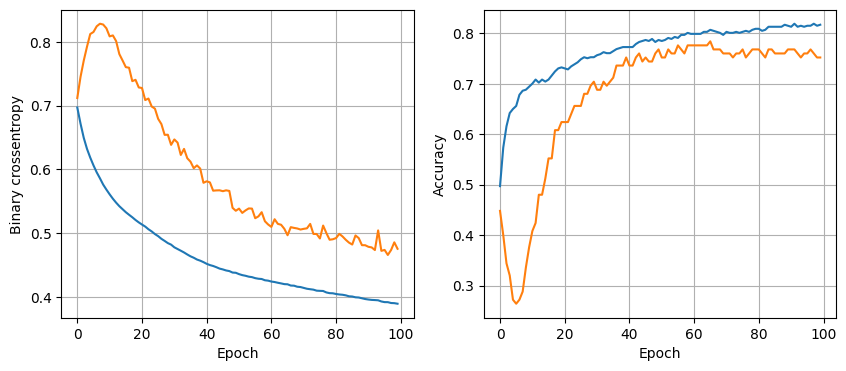

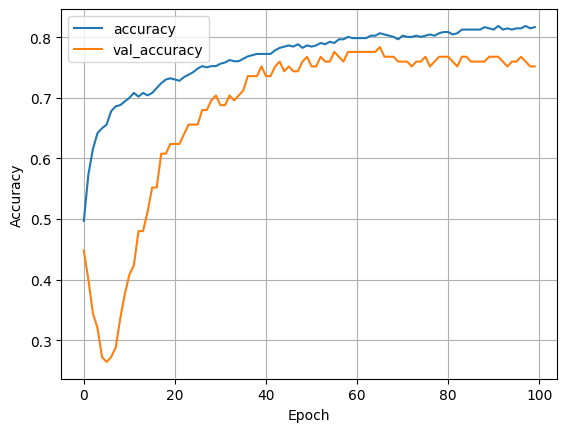

In [ ]:
#Training the model
#params data, output, learning rate, batchsize, epochs
model, history = train_model(X_train, y_train, 0.001, 32, 100)

plot_history(history)
plot_accuracy(history)

5/5 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Last neuron fired with')

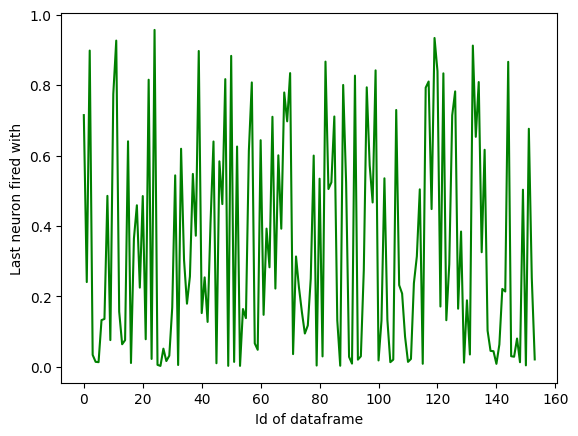

In [ ]:
#predictii pe test sample
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
plt.clf()
plt.plot(predictions, color="green")
plt.xlabel("Id of dataframe")
plt.ylabel("Last neuron fired with")

In [ ]:
#We now make a report based on the test set 
#the metrics are weak, so for better metrics, tuning the parameters is in order
predictions = (predictions > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67        96
           1       0.42      0.38      0.40        58

    accuracy                           0.57       154
   macro avg       0.54      0.53      0.53       154
weighted avg       0.56      0.57      0.57       154

